In [17]:
import pandas as pd
import os
from data_preprocessing import preprocess_dataframe
from descriptor_calculation import descriptor_cal
# from descriptor_calculation import smiles_solvent_descriptors
from train_func import train_models
import shutil
import deepchem as dc
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from rdkit import Chem
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# AbsorptionMax best model save

In [18]:
# import descriptors used to train best model
path_to_X = "LambdaMaxDesc_10JUNE2023/MACCSKeysFingerprint/X.csv"
path_to_Y = "LambdaMaxDesc_10JUNE2023/MACCSKeysFingerprint/Y.csv"

In [19]:
X = pd.read_csv(path_to_X)
Y = pd.read_csv(path_to_Y)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import os

def train_and_save_best_model(X, Y):
    # Create a directory to store the best models
    if not os.path.exists("best_models"):
        os.makedirs("best_models")
    
    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Train a random forest regressor
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, Y_train)
    
    # Evaluate the model on the test set
    Y_pred = rf.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    
    # Save the model to disk
    import joblib
    model_path = os.path.join("best_models", "new_best_regressor.joblib")
    joblib.dump(rf, model_path)
    
    return r2


In [21]:
train_and_save_best_model(X,Y)

/var/folders/bs/93lly5bn7kj02x6fy_g1dkv80000gn/T/ipykernel_83139/60129055.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.9241941019925254

## Predict AbsorptionMax given smiles:

In [25]:


# Set the path to the saved model
MODEL_PATH = "best_models/new_best_regressor.joblib"

def predict_absorption_max(smiles,solvent):
    # Calculate RDKit descriptors using DeepChem
    mol = Chem.MolFromSmiles(smiles)
    featurizer = dc.feat.MACCSKeysFingerprint()
    descriptors = featurizer.featurize([mol])
    smiles_desc = pd.DataFrame(data=descriptors)

    mol = Chem.MolFromSmiles(solvent)
    featurizer = dc.feat.MACCSKeysFingerprint()
    descriptors = featurizer.featurize([mol])
    solvent_desc = pd.DataFrame(data=descriptors)

    X = pd.concat([smiles_desc, solvent_desc], axis=1)
    
    # Load the saved model and use it to predict the absorption max
    model = joblib.load(MODEL_PATH)
    y_pred = model.predict(X)
    absorption_max = y_pred[0]
    
    return absorption_max

In [26]:
predict_absorption_max("N#Cc1cc2ccc(O)cc2oc1=O", "O")

/Users/mdk/Desktop/Fluorescent_compound_prediction_Updated/Fluorescent_compound_prediction/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


342.67199999999997

In [27]:
predict_absorption_max("[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34", "CS(C)=O")

/Users/mdk/Desktop/Fluorescent_compound_prediction_Updated/Fluorescent_compound_prediction/venv/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


456.80939393939394

In [28]:
# import descriptors used to train best model
path_to_X = "LambdaMaxDesc_10JUNE2023/MACCSKeysFingerprint/X.csv"
path_to_Y = "LambdaMaxDesc_10JUNE2023/MACCSKeysFingerprint/Y.csv"
X = pd.read_csv(path_to_X)
Y = pd.read_csv(path_to_Y)

In [29]:
MODEL_PATH = "best_models/new_best_regressor.joblib"
model = joblib.load(MODEL_PATH)
y_pred = model.predict(X)
# absorption_max = y_pred[0]

In [30]:
Y["y_prediction"] = y_pred

In [31]:
Y.head(40)

,AbsorptioMax (nm),y_prediction
0,355.0,342.672000
1,408.0,440.270000
2,526.0,486.886667
3,514.0,359.768752
4,524.0,456.809394
5,350.0,353.620000
6,361.0,365.630000
7,367.0,372.416667
8,373.0,377.270000
9,384.0,382.240000


In [32]:
Y["AbsorptioMax (nm)"].to_list()[:20]

[355.0,
 408.0,
 526.0,
 514.0,
 524.0,
 350.0,
 361.0,
 367.0,
 373.0,
 384.0,
 376.0,
 392.0,
 396.0,
 400.0,
 413.0,
 361.0,
 380.0,
 387.0,
 396.0,
 393.0]

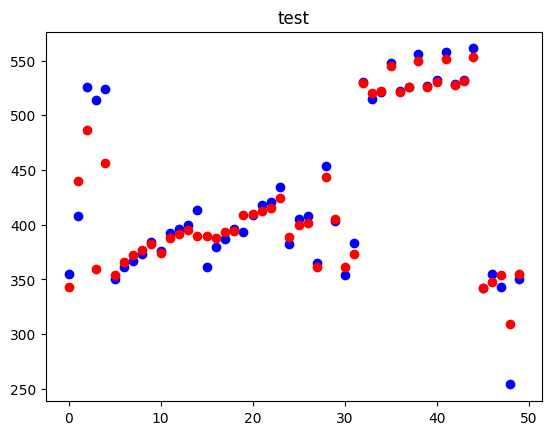

In [34]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if float(max(y_test)) >= float(max(y_pred)):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return



plotGraph(Y["AbsorptioMax (nm)"].to_list()[:50], y_pred[:50], "test")

# Classification:

In [29]:
# import descriptors used to train best model
path_to_X = "Smiles_Descriptors/Morgan fingerprints/X.csv"
path_to_Y = "Smiles_Descriptors/Morgan fingerprints/Y.csv"

In [30]:
X = pd.read_csv(path_to_X)
Y = pd.read_csv(path_to_Y)

In [33]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_and_save_best_model(X, Y):
    # Create a directory to store the best models
    if not os.path.exists("best_models"):
        os.makedirs("best_models")
    
    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Train a random forest regressor
    rf = RandomForestClassifier()

    rf.fit(X_train, Y_train)
    
    # Evaluate the model on the test set
    Y_pred = rf.predict(X_test)
    acc_score = accuracy_score(Y_test, Y_pred)
    
    # Save the model to disk
    import joblib
    model_path = os.path.join("best_models", "best_classifier.joblib")
    joblib.dump(rf, model_path)
    
    return acc_score


In [34]:
train_and_save_best_model(X, Y)

/var/folders/nf/xdcscmx50n3ccqpvd73zgys00000gn/T/ipykernel_29972/1093630908.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


0.987489574645538

In [40]:


# Set the path to the saved model
MODEL_PATH = "best_models/best_classifier.joblib"

def predict_absorption_max(smiles):
    # Calculate RDKit descriptors using DeepChem
    mol = Chem.MolFromSmiles(smiles)
    featurizer = dc.feat.CircularFingerprint(radius=3, size=1024)
    descriptors = featurizer.featurize([mol])
    X = pd.DataFrame(data=descriptors)
    
    # Load the saved model and use it to predict the absorption max
    model = joblib.load(MODEL_PATH)
    y_pred = model.predict(X)
    prediction = y_pred[0]
    
    return "Fluroscent" if prediction==1 else "Non-Fluroscent"

In [41]:
predict_absorption_max("N#Cc1cc2ccc(O)cc2oc1=O")

/Users/ganeshjadhav/opt/anaconda3/envs/ML-for-LSD1-main/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Fluroscent'

In [42]:
predict_absorption_max("FC(F)(F)C1=CN(CC2=CSC(NC3=CC=CC=C3)=N2)C(=O)C=C1")

/Users/ganeshjadhav/opt/anaconda3/envs/ML-for-LSD1-main/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Non-Fluroscent'

In [43]:
def draw_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Chem.Draw.MolToImage(mol)

In [45]:
A= draw_molecule("FC(F)(F)C1=CN(CC2=CSC(NC3=CC=CC=C3)=N2)C(=O)C=C1")

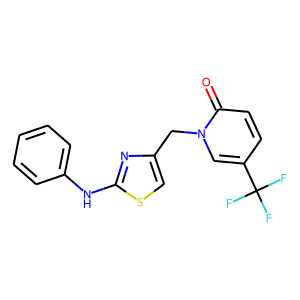

In [46]:
A

In [47]:
type(A)

PIL.PngImagePlugin.PngImageFile